# Bike Sharing Assignment - Multiple Linear Regression
####                                                                                                              by Pramod Chilakalapudi

#### Problem Statement:

Build a multiple linear regression model for the prediction of demand for shared bikes.

A US bike-sharing provider BoomBikes, want to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes
2. How well those variables describe the bike demands


### Steps to follow in this excercise:
1. Supress Warnings and Importing Libraries
2. Read, Understand and Visualize the Data
3. Prepare the data for modeling (Train-Test split,Preprocessing Steps such as : Rescalling, etc.,)
4. Traing the model
5. Residual Analisis
6. Predection and evaluation of Test-Set


## Step 1: Supress Warnings and Importing Libraries



In [1]:
# A.Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# B.Import Libraraies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Read, Understand and Visualize the Data

In [2]:
# Import day.csv file into data

data = pd.read_csv("day.csv")


In [3]:
# Check the head of the dataset
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Indentify Droplist from the data.head() output and data dictionary
1. instant [DROP] : record index, has unique values for each row. Not a predector variable, Hence can be dropped.
2. dteday [DROP]: date is alreaady in yr, mnth, holiday, weekday, working day. data alreay prest in ohter columns. hnce drop it
3. season : (1:spring, 2:summer, 3:fall, 4:winter) - Categorical column 
4. yr : year (0: 2018, 1:2019) - Binary column 
5. mnth : month ( 1 to 12) - Catagorical 
6. holiday : (0 - No, 1 - Yes,holiday) - Binary 
7. weekday : (0 - sunday, 1- monday,..6-saturday) - Categorical
8. workingday : (0-No, 1- Yes ) Binary
9. weathersit : (1 -, 2-, 3-, 4-, ) - Categorical

NOTE : temp, atemp, hum, windspeed - Continous
NOTE: Use only one of temp or atemp after checing corelation
10. temp : temperature in Celsius - Same as atem  - Continous
11. atemp [DROP]: feeling temperature in Celsius  - same as temp  - Continous
 
12. hum: humidity  - Continous
13. windspeed: wind speed  - Continous

NOTE: Casual, regersters are sumed into cnt which is the Y, target varaiable 
14. casual [DROP]: count of casual users. as these are part of Y , target variable
15. registered [DROP]: count of registered users, as these are part of Y , target variable
16. cnt: count of total rental bikes including both casual and registered


In [4]:
# Check the shape for Size/Count of records
data.shape

(730, 16)

In [5]:
# To inspect the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Statistical summary of all numeric variables
data.describe() 

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
# Dropping variables from data
data = data.drop(["instant", "dteday", "casual", "registered"], axis = 1)

### Missing Values

In [8]:
missing_values = pd.DataFrame(data.isnull().sum())
np.transpose(missing_values)

season  yr  mnth  holiday  weekday  workingday  weathersit  temp  atemp  \
0       0   0     0        0        0           0           0     0      0   

   hum  windspeed  cnt  
0    0          0    0

#### NO Missing Values to take care

### Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [9]:
# Plot for Numaric Varaibles
sns.pairplot(data)
plt.show()

#### Droping column atemp

Form above pairplot it can be observed that atemp and temp are corelated. Hence column atem can be dropped

In [10]:
# droping atemp, as its corelated with temp
data = data.drop(["atemp"], axis = 1)

#### Converting Categorical Variables into String format and then converting their  to Text

In [11]:
#Converting Weekdays to String and then numbers to Day names
data['weekday']=data.weekday.astype(str)
data["weekday"].replace({"0": "Sunday", "1": "Monday","2": "Tuesday", "3": "Wednesday","4": "Thrusday", "5": "Friday","6": "Saturday" }, inplace=True)

#Converting weathersit to String and then numbers to Day names
data['weathersit']=data.weathersit.astype(str)
data["weathersit"].replace({"1": "Clear", "2": "Mist","3": "Light Rain", "4": "Heavy Rain"}, inplace=True)

# Converting Seasons to String and then numbers to Season text
data['season']=data.season.astype(str)
data["season"].replace({"1": "Spring", "2": "Summer","3": "Fall", "4": "Winter"}, inplace=True)

# Converting Month to string and then numbers to Month Text.
data['mnth']=data.mnth.astype(str)
data["mnth"].replace({"1": "Jan", "2": "Feb","3": "March", "4": "April","5": "May", "6": "June","7": "July","8": "Aug", "9": "Sept","10": "Oct", "11": "Nov","12": "Dec" }, inplace=True)


data.head(20)

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0   Spring   0  Jan        0   Saturday           0       Mist  14.110847   
1   Spring   0  Jan        0     Sunday           0       Mist  14.902598   
2   Spring   0  Jan        0     Monday           1      Clear   8.050924   
3   Spring   0  Jan        0    Tuesday           1      Clear   8.200000   
4   Spring   0  Jan        0  Wednesday           1      Clear   9.305237   
5   Spring   0  Jan        0   Thrusday           1      Clear   8.378268   
6   Spring   0  Jan        0     Friday           1       Mist   8.057402   
7   Spring   0  Jan        0   Saturday           0       Mist   6.765000   
8   Spring   0  Jan        0     Sunday           0      Clear   5.671653   
9   Spring   0  Jan        0     Monday           1      Clear   6.184153   
10  Spring   0  Jan        0    Tuesday           1       Mist   6.932731   
11  Spring   0  Jan        0  Wednesday           1      Clear   7.081807   
12  Spring   0  Jan        0   Thrusday           1      Clear   6.765000   
13  Spring   0  Jan        0     Friday           1      Clear   6.595670   
14  Spring   0  Jan        0   Saturday           0       Mist   9.566653   
15  Spring   0  Jan        0     Sunday           0      Clear   9.498347   
16  Spring   0  Jan        1     Monday           0       Mist   7.209153   
17  Spring   0  Jan        0    Tuesday           1       Mist   8.883347   
18  Spring   0  Jan        0  Wednesday           1       Mist  11.979134   
19  Spring   0  Jan        0   Thrusday           1       Mist  10.728347   

        hum  windspeed   cnt  
0   80.5833  10.749882   985  
1   69.6087  16.652113   801  
2   43.7273  16.636703  1349  
3   59.0435  10.739832  1562  
4   43.6957  12.522300  1600  
5   51.8261   6.000868  1606  
6   49.8696  11.304642  1510  
7   53.5833  17.875868   959  
8   43.4167  24.250650   822  
9   48.2917  14.958889  1321  
10  68.6364   8.182844  1263  
11  59.9545  20.410009  1162  
12  47.0417  20.167000  1406  
13  53.7826   8.478716  1421  
14  49.8750  10.583521  1248  
15  48.3750  12.625011  1204  
16  53.7500  12.999139  1000  
17  86.1667   9.833925   683  
18  74.1739  13.957239  1650  
19  53.8333  13.125568  1927

#### Creating Dummy Varaibles

In [12]:
# Create dummy variables for weekday and store it in a new variable - 'weekday_d'
weekday_d = pd.get_dummies(data['weekday'], drop_first=True)

# Check what the dataset 'weekday' looks like
weekday_d.head(7)

Monday  Saturday  Sunday  Thrusday  Tuesday  Wednesday
0       0         1       0         0        0          0
1       0         0       1         0        0          0
2       1         0       0         0        0          0
3       0         0       0         0        1          0
4       0         0       0         0        0          1
5       0         0       0         1        0          0
6       0         0       0         0        0          0

In [13]:
weekday_d = pd.get_dummies(data['weekday'], drop_first=True)
# Add the results to the original data dataframe
data = pd.concat([data, weekday_d], axis = 1)

# Now let's see the head of our dataframe.
data.head()

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0   Saturday           0       Mist  14.110847   
1  Spring   0  Jan        0     Sunday           0       Mist  14.902598   
2  Spring   0  Jan        0     Monday           1      Clear   8.050924   
3  Spring   0  Jan        0    Tuesday           1      Clear   8.200000   
4  Spring   0  Jan        0  Wednesday           1      Clear   9.305237   

       hum  windspeed   cnt  Monday  Saturday  Sunday  Thrusday  Tuesday  \
0  80.5833  10.749882   985       0         1       0         0        0   
1  69.6087  16.652113   801       0         0       1         0        0   
2  43.7273  16.636703  1349       1         0       0         0        0   
3  59.0435  10.739832  1562       0         0       0         0        1   
4  43.6957  12.522300  1600       0         0       0         0        0   

   Wednesday  
0          0  
1          0  
2          0  
3          0  
4          1

In [14]:
# Create dummy variables for season and store it in a new variable - 'season_d'
season_d = pd.get_dummies(data['season'], drop_first=True)
# Add the results to the original data dataframe
data = pd.concat([data, season_d], axis = 1)

# Create dummy variables for mnth and store it in a new variable - 'month_d'
month_d = pd.get_dummies(data['mnth'], drop_first=True)
# Add the results to the original data dataframe
data = pd.concat([data, month_d], axis = 1)

# Create dummy variables for weathersit and store it in a new variable - 'weather_d'
weather_d = pd.get_dummies(data['weathersit'], drop_first=True)
# Add the results to the original data dataframe
data = pd.concat([data, weather_d], axis = 1)

data.head()

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0   Saturday           0       Mist  14.110847   
1  Spring   0  Jan        0     Sunday           0       Mist  14.902598   
2  Spring   0  Jan        0     Monday           1      Clear   8.050924   
3  Spring   0  Jan        0    Tuesday           1      Clear   8.200000   
4  Spring   0  Jan        0  Wednesday           1      Clear   9.305237   

       hum  windspeed  ...  Jan  July  June  March  May  Nov  Oct  Sept  \
0  80.5833  10.749882  ...    1     0     0      0    0    0    0     0   
1  69.6087  16.652113  ...    1     0     0      0    0    0    0     0   
2  43.7273  16.636703  ...    1     0     0      0    0    0    0     0   
3  59.0435  10.739832  ...    1     0     0      0    0    0    0     0   
4  43.6957  12.522300  ...    1     0     0      0    0    0    0     0   

   Light Rain  Mist  
0           0     1  
1           0     1  
2           0     0  
3           0     0  
4           0     0  

[5 rows x 33 columns]

In [15]:
# Drop columns Season, mnth, weekday and Weatersit

data = data.drop(["season","mnth","weathersit","weekday"], axis = 1)
data.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  Monday  \
0   0        0           0  14.110847  80.5833  10.749882   985       0   
1   0        0           0  14.902598  69.6087  16.652113   801       0   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       0   
4   0        0           1   9.305237  43.6957  12.522300  1600       0   

   Saturday  Sunday  ...  Jan  July  June  March  May  Nov  Oct  Sept  \
0         1       0  ...    1     0     0      0    0    0    0     0   
1         0       1  ...    1     0     0      0    0    0    0     0   
2         0       0  ...    1     0     0      0    0    0    0     0   
3         0       0  ...    1     0     0      0    0    0    0     0   
4         0       0  ...    1     0     0      0    0    0    0     0   

   Light Rain  Mist  
0           0     1  
1           0     1  
2           0     0  
3           0     0  
4           0     0  

[5 rows x 29 columns]

## 3. Prepare the data for modeling (Train-Test split,Preprocessing Steps such as : Rescaling, etc.,)

#### As you know, the first basic step for regression is performing a train-test split.

In [16]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling using MinMax for first model

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
#1. Create/Instantiate the object
scaler = MinMaxScaler()

In [19]:
# Apply scaler() to all the columns except the 'Binary' and 'Dummy' variables
#2. Identify Numaric/Continous variables that need scaling
num_vars = ['temp', 'hum','windspeed','cnt']

#3. Fit (Xmin,Xmax) and Transform (Normalize) the Data 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [20]:
# check scalar changes to df_train
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  Monday  \
653   1        0           1  0.509887  0.575354   0.300794  0.864243       0   
576   1        0           1  0.815169  0.725633   0.264686  0.827658       0   
426   1        0           0  0.442393  0.640189   0.255342  0.465255       0   
728   1        0           0  0.245101  0.498067   0.663106  0.204096       0   
482   1        0           0  0.395666  0.504508   0.188475  0.482973       0   

     Saturday  Sunday  ...  Jan  July  June  March  May  Nov  Oct  Sept  \
653         0       0  ...    0     0     0      0    0    0    1     0   
576         0       0  ...    0     1     0      0    0    0    0     0   
426         1       0  ...    0     0     0      1    0    0    0     0   
728         0       1  ...    0     0     0      0    0    0    0     0   
482         1       0  ...    0     0     0      0    0    0    0     0   

     Light Rain  Mist  
653           0     0  
576           0     0  
426           0     1  
728           0     0  
482           0     1  

[5 rows x 29 columns]

In [21]:
# check Stats 
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.468282    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      Monday    Saturday      Sunday  ...         Jan  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513620    0.150980    0.154902    0.143137  ...    0.088235   
std      0.224593    0.358381    0.362166    0.350557  ...    0.283915   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

             July        June       March         May         Nov         Oct  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.076471    0.074510    0.098039    0.084314    0.086275    0.086275   
std      0.266010    0.262857    0.297660    0.278131    0.281045    0.281045   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             Sept  Light Rain        Mist  
count  510.000000  510.000000  510.000000  
mean     0.080392    0.029412    0.343137  
std      0.272166    0.169124    0.475223  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [22]:
# Let's check the correlation coefficients to see which variables are highly correlated eith HEATMAP
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train

## 4. Building our Model 

We will be using the Recursive feature elimination (RFE) **LinearRegression function from SciKit Learn**

In [24]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thrusday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sept', True, 1),
 ('Light Rain', True, 1),
 ('Mist', True, 1)]

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Saturday',
       'Spring', 'Summer', 'Winter', 'Jan', 'July', 'Sept', 'Light Rain',
       'Mist'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['Monday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'June', 'March', 'May', 'Nov', 'Oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [30]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [31]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [32]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        22:23:44   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

#### This model has R2 as 84.9%

### Calculate VIF 

In [33]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
X_train_dum = X_train_rfe
X_train_dum = X_train_dum.drop(['const'], axis=1)

vif['Features'] = X_train_dum.columns
vif['VIF'] = [variance_inflation_factor(X_train_dum.values, i) for i in range(X_train_dum.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4          hum  29.40
3         temp  17.77
2   workingday   5.31
5    windspeed   4.73
7       Spring   4.53
9       Winter   3.48
8       Summer   2.84
14        Mist   2.29
0           yr   2.09
6     Saturday   1.98
10         Jan   1.67
11        July   1.59
12        Sept   1.39
13  Light Rain   1.25
1      holiday   1.18

In [35]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('hum', 1)

In [36]:
# Build a second fitted model
lr_2 = sm.OLS(y_train, X_train_rfe).fit()

In [37]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.33e-189
Time:                        22:23:45   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

#### Dropping 'hum' did not reduce the R2 significently. 
 now check the VIF for reamaining varaibles

In [38]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
X_train_dum = X_train_rfe
X_train_dum = X_train_dum.drop(['const'], axis=1)

vif['Features'] = X_train_dum.columns
vif['VIF'] = [variance_inflation_factor(X_train_dum.values, i) for i in range(X_train_dum.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3         temp  7.07
2   workingday  5.24
4    windspeed  4.67
6       Spring  3.08
7       Summer  2.33
0           yr  2.08
8       Winter  1.99
5     Saturday  1.97
9          Jan  1.62
10        July  1.59
13        Mist  1.57
11        Sept  1.35
1      holiday  1.17
12  Light Rain  1.09

In [39]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('temp', 1)

In [40]:
# Build a second fitted model
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

In [41]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.04e-154
Time:                        22:23:45   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5448      0.020     27.136      0.0

### Removing Temp is causing significant drop in R2
Put it back in remove some other variable

In [42]:
# RE-creating X_test_rfe and dropping 'hum' column 
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe = X_train_rfe.drop('hum', 1)
X_train_rfe.head()

const  yr  holiday  workingday      temp  windspeed  Saturday  Spring  \
653    1.0   1        0           1  0.509887   0.300794         0       0   
576    1.0   1        0           1  0.815169   0.264686         0       0   
426    1.0   1        0           0  0.442393   0.255342         1       1   
728    1.0   1        0           0  0.245101   0.663106         0       1   
482    1.0   1        0           0  0.395666   0.188475         1       0   

     Summer  Winter  Jan  July  Sept  Light Rain  Mist  
653       0       1    0     0     0           0     0  
576       0       0    0     1     0           0     0  
426       0       0    0     0     0           0     1  
728       0       0    0     0     0           0     0  
482       1       0    0     0     0           0     1

In [43]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('workingday', 1)
# Build a next fitted model
lr_4 = sm.OLS(y_train, X_train_rfe).fit()
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.21e-186
Time:                        22:23:45   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2121      0.030      6.986      0.0

In [44]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
X_train_dum = X_train_rfe
X_train_dum = X_train_dum.drop(['const'], axis=1)

vif['Features'] = X_train_dum.columns
vif['VIF'] = [variance_inflation_factor(X_train_dum.values, i) for i in range(X_train_dum.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2         temp  5.16
3    windspeed  4.64
5       Spring  2.76
6       Summer  2.23
0           yr  2.07
7       Winter  1.80
8          Jan  1.61
9         July  1.59
12        Mist  1.56
10        Sept  1.34
4     Saturday  1.19
11  Light Rain  1.08
1      holiday  1.05

In [45]:
## Corrilation b/n the columns
X_train_dum = X_train_rfe
X_train_dum = X_train_dum.drop(['const'], axis=1)
plt.figure(figsize = (20, 20))
sns.heatmap(X_train_dum.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Good Correlation between temp and July is 41% , between Jan and Sprint is 55%

In [46]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('Jan', 1)
X_train_rfe = X_train_rfe.drop('July', 1)
# Build a next fitted model
lr_5 = sm.OLS(y_train, X_train_rfe).fit()
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.79e-186
Time:                        22:23:46   Log-Likelihood:                 496.65
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     498   BIC:                            -918.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1875      0.030      6.336      0.0

### R2 still at 83.4, no significant change

In [47]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
X_train_dum = X_train_rfe
X_train_dum = X_train_dum.drop(['const'], axis=1)

vif['Features'] = X_train_dum.columns
vif['VIF'] = [variance_inflation_factor(X_train_dum.values, i) for i in range(X_train_dum.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3    windspeed  4.61
2         temp  3.87
0           yr  2.07
5       Spring  2.01
6       Summer  1.89
7       Winter  1.65
10        Mist  1.54
8         Sept  1.23
4     Saturday  1.19
9   Light Rain  1.08
1      holiday  1.05

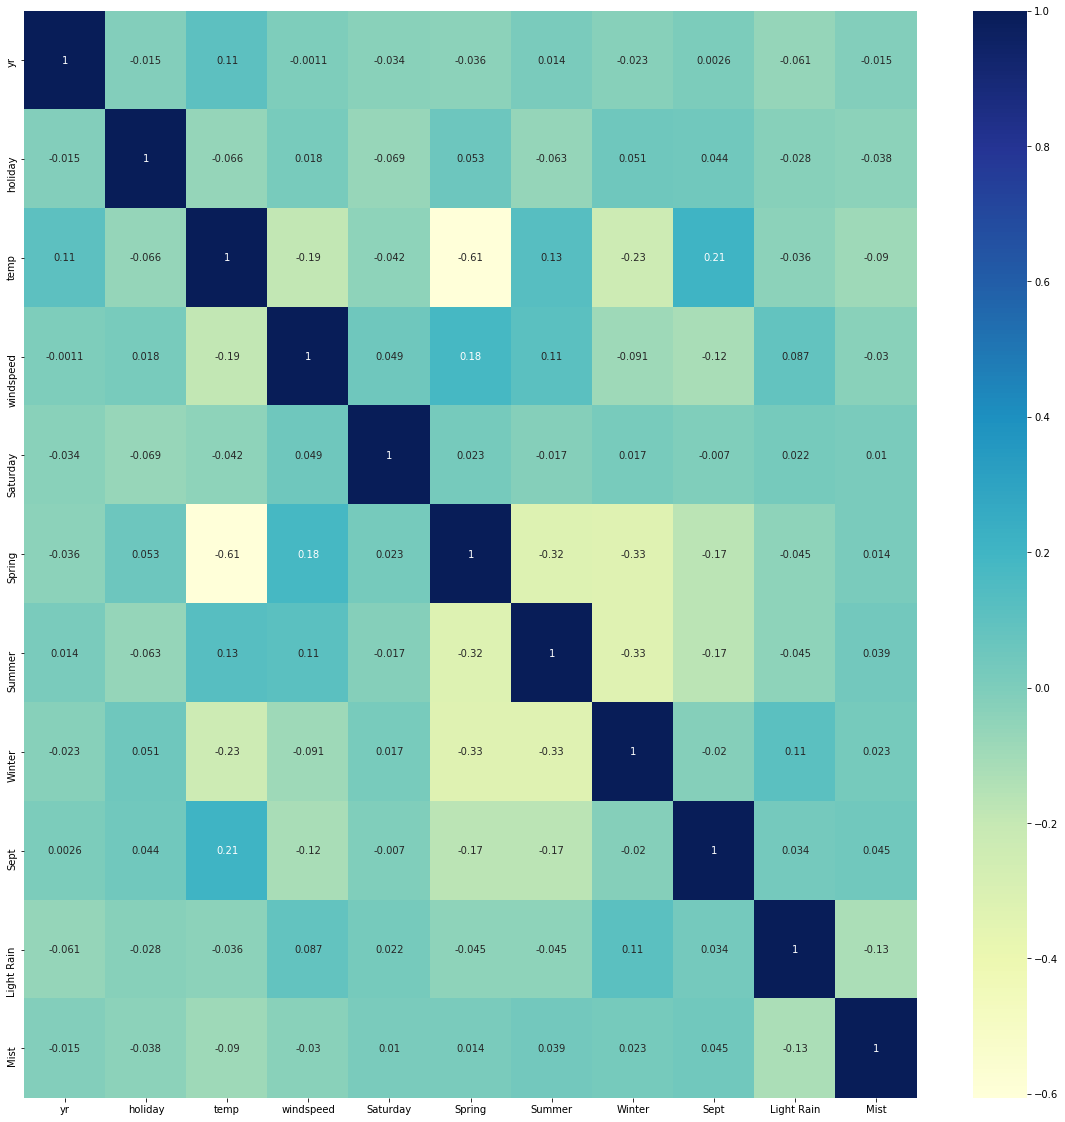

In [48]:
## Corrilation b/n the columns
X_train_dum = X_train_rfe
X_train_dum = X_train_dum.drop(['const'], axis=1)
plt.figure(figsize = (20, 20))
sns.heatmap(X_train_dum.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Remove Saturday as low corelation, High P-Value .088, low VIF

In [49]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('Saturday', 1)
# Build a next fitted model
lr_6 = sm.OLS(y_train, X_train_rfe).fit()
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.36e-187
Time:                        22:23:46   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

## 5. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [50]:
# create Y train with latest Model lr_6
y_train_cnt = lr_6.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

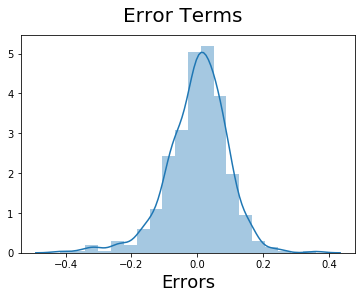

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## 6. Predection and evaluation of Test-Set

#### Applying scaling to Test Set

In [52]:
num_vars = ['temp','hum','windspeed','cnt'] 

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_train_new = X_train_rfe
x_train_new = x_train_new.drop(['const'], axis=1)
X_test_new = X_test[x_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [55]:
# Making predictions
y_pred = lr_6.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

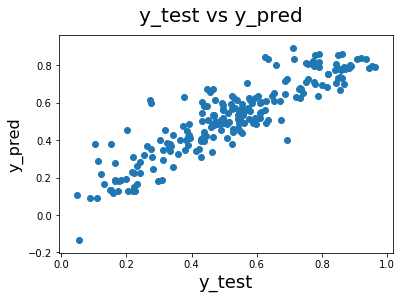

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8035441330582013

## Conclusion

This is a good model for below reasons

1. R2_Score is 80.35%
2. Difference between Test and Train is not more than 5% hence its a good model
3. Has Predector variables <= 10
4. Has VIF<=5 

Best fitted line is as follows for the 'cnt'
    
    cnt = 0.191 + (yr * 0.2341) - (holiday * 0.0969) + (temp * 0.4782) - (windspeed * 0.1482) 
                - (Spring * 0.0551) + (Summer * 0.0610) + (Winter * 0.0959)
                + (Sept * 0.0909) - (Light Rain * 0.2860) - (Mist * 0.0801)